In [1]:
!pip install diffusers transformers accelerate gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 33.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

2025-05-19 04:50:36.419615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747630236.652810      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747630236.719589      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, easyocr, fastai, kornia, peft, pytorch-ignite, pytorch-lightning, sentence-transformers, stable-baselines3, timm, torchaudio, torchdata, torchmetrics, torchvision


In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [15]:
prompt = """futuristic car"""

In [16]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

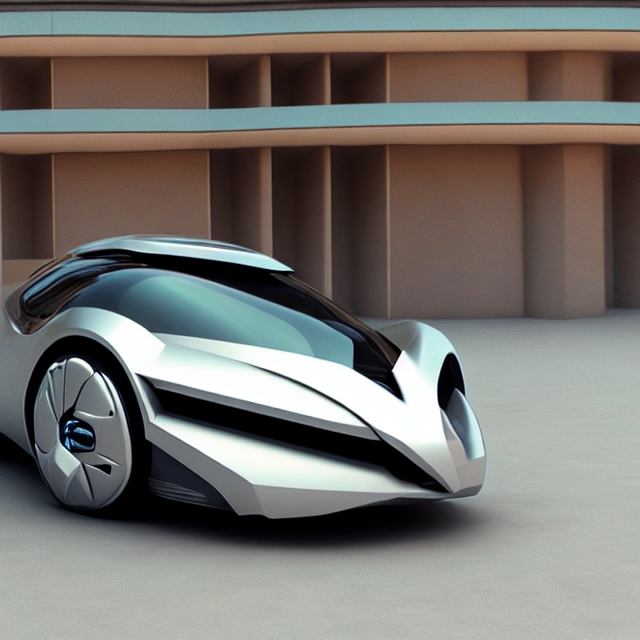

In [17]:
image

[PROMPT]:  futuristic car


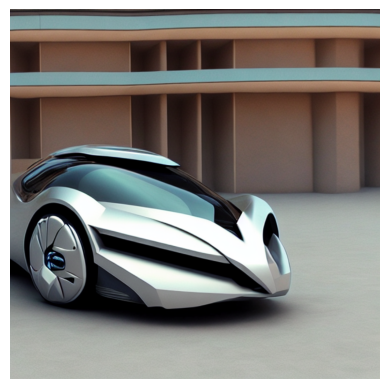

In [18]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [19]:
prompt2 = """A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris



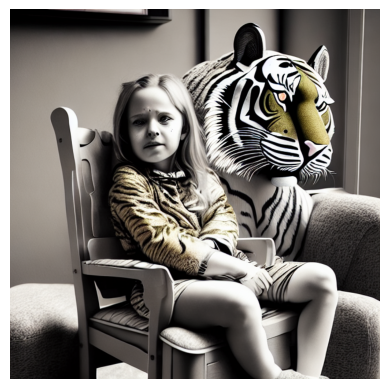

In [20]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

In [21]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [22]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

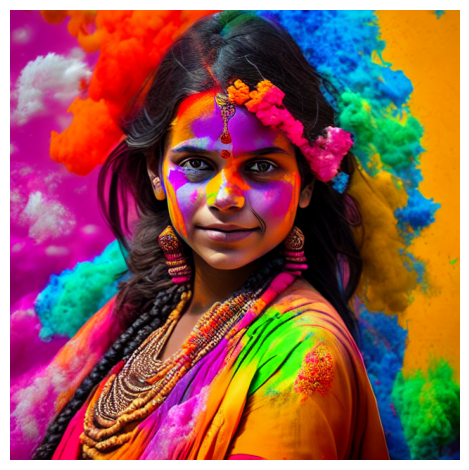

In [23]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

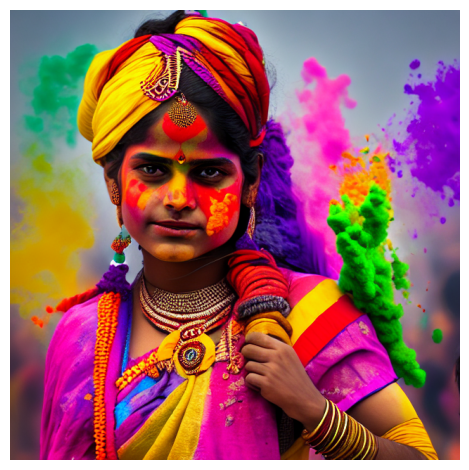

In [24]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

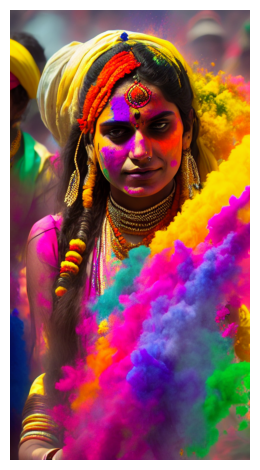

In [25]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

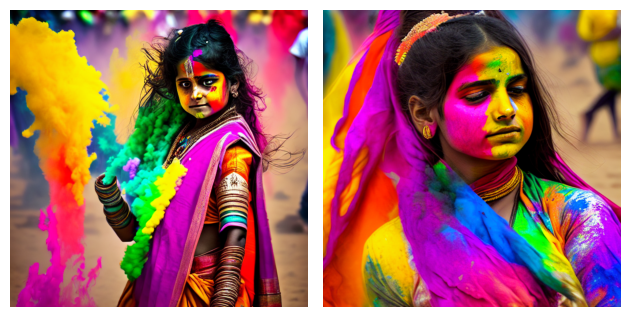

In [26]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

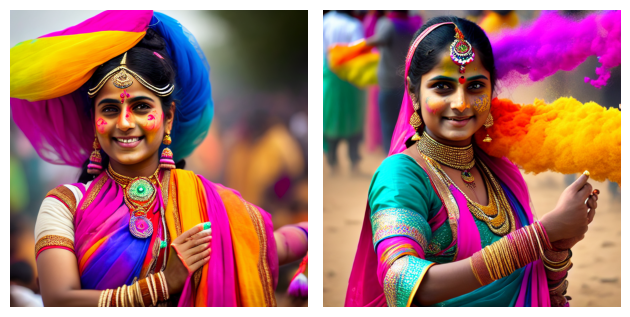

In [27]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)